# Understanding RNN Variants

# LSTM Networks


LSTMs (Long Short Term Memory networks)  are a type of recurrent neural network (RNN) architecture designed to address the vanishing gradient problem in traditional RNNs.

Further, they are capable of learning and remembering long-term dependencies in sequential data.

### **Architecture**:

LSTMs consist of memory cells and gating mechanisms, including the forget gate, input gate, and output gate.

These gates control the flow of information through the network, allowing LSTMs to selectively remember or forget information over time.







LSTM has three different gates forget gate, input gate and output gate. Each of them is discussed below:

* **Memory/Cell State**: The cell state stores information over time and is regulated by the gating mechanisms.
* **Forget Gate**: Determines which information to discard from the cell state.
* **Input Gate**: Decides which new information to update and store in the cell state.
* **Output Gate**: Controls which information to output from the cell state.

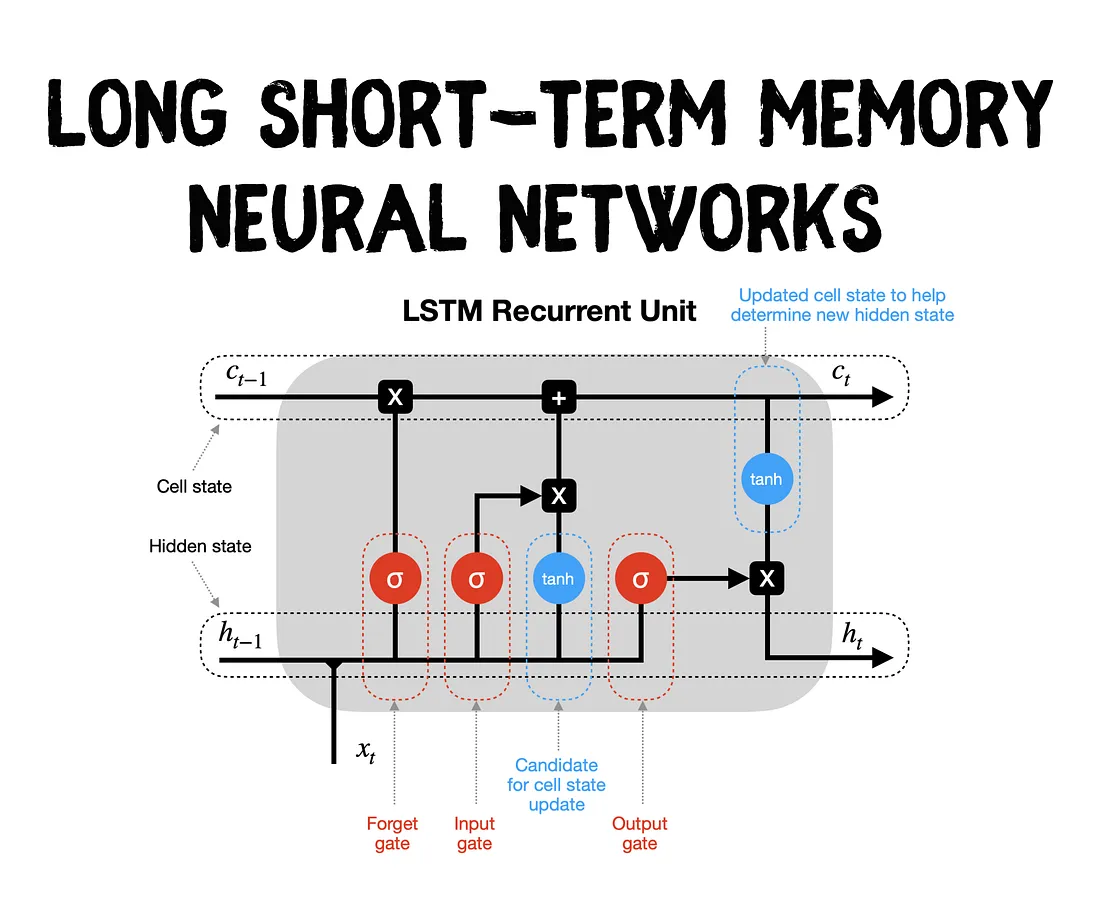

The compact forms of the equations for the forward pass of an LSTM cell :


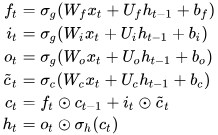

where the initial values are
𝑐
0
=
0
 and
ℎ
0
=
0
 and the operator
⊙ denotes the Hadamard product (element-wise product). The subscript
𝑡
 indexes the time step.

**Activation functions:**

𝜎
𝑔
: sigmoid function.

𝜎
𝑐
: hyperbolic tangent function.

𝜎
ℎ
: hyperbolic tangent function or, as the LSTM Architecture suggests,

#### 𝜎 ℎ ( 𝑥 ) = 𝑥

### Training and Backpropagation:

 LSTMs are trained using gradient-based optimization algorithms like stochastic gradient descent (SGD).

 The backpropagation algorithm is used to compute gradients and update the model's parameters during training.

### Vanishing Gradient Problem:

 LSTMs were designed to mitigate the vanishing gradient problem, which occurs when gradients become very small during backpropagation in deep networks. By introducing gating mechanisms, LSTMs can preserve gradient flow over long sequences.


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, GRU

In [5]:
# Load the IMDb dataset
(train_input,train_target),(test_input,test_target) = imdb.load_data(num_words=10000)

# Pad sequences to have the same length
train_input = pad_sequences(train_input, maxlen=100)
test_input = pad_sequences(test_input, maxlen=100)

In [6]:
# Define the LSTM model
model = Sequential([
    Embedding(10000, 32, input_length=100),
    LSTM(5, return_sequences=False),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 32)           320000    
                                                                 
 lstm_1 (LSTM)               (None, 5)                 760       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 320766 (1.22 MB)
Trainable params: 320766 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(train_input, train_target, epochs=5, batch_size=32, validation_data=(test_input,test_target))

Epoch 1/5
782/782 [==============================] - 28s 34ms/step - loss: 0.4638 - accuracy: 0.7818 - val_loss: 0.3677 - val_accuracy: 0.8404
Epoch 2/5
782/782 [==============================] - 23s 30ms/step - loss: 0.2816 - accuracy: 0.8890 - val_loss: 0.3555 - val_accuracy: 0.8460
Epoch 3/5
782/782 [==============================] - 25s 32ms/step - loss: 0.2076 - accuracy: 0.9224 - val_loss: 0.3752 - val_accuracy: 0.8445
Epoch 4/5
782/782 [==============================] - 26s 34ms/step - loss: 0.1573 - accuracy: 0.9443 - val_loss: 0.4489 - val_accuracy: 0.8392
Epoch 5/5
782/782 [==============================] - 25s 32ms/step - loss: 0.1203 - accuracy: 0.9609 - val_loss: 0.5063 - val_accuracy: 0.8314





### Hyperparameters:

Tuning hyperparameters such as the number of hidden units, learning rate, and batch size can significantly impact the performance of LSTM models. Cross-validation and hyperparameter search techniques are commonly used to find optimal settings.

1. **Regularization**: Techniques like dropout and weight regularization can be applied to prevent overfitting in LSTM models and improve generalization performance.

2. **Optimization Techniques**: Advanced optimization techniques like adaptive learning rate methods (e.g., Adam, RMSProp) and second-order optimization methods can be used to accelerate training and improve convergence in LSTM models.

3. **Attention Mechanisms**: Attention mechanisms can be incorporated into LSTM models to selectively focus on different parts of the input sequence, improving their ability to capture relevant information and ignore irrelevant noise.






### Applications:

 LSTMs are widely used in various applications, including natural language processing (NLP), machine translation ,sentiment analysis, speech recognition, time series analysis, and sequence prediction tasks.


### Advanced Architectures:

Variants of LSTMs, such as bidirectional LSTM, stacked LSTMs, hierarchical LSTMs, and convolutional LSTMs, have been developed to address specific challenges and improve performance on various tasks.

## GRU Networks:

Gated Recurrent Units (GRUs) are a type of recurrent neural network (RNN) architecture similar to Long Short-Term Memory (LSTM) networks. They are designed to address the vanishing gradient problem and capture long-term dependencies in sequential data.


### **Architecture**:

GRUs consist of update gates and reset gates, which control the flow of information through the network. They have fewer parameters compared to LSTMs, making them computationally more efficient.


GRU has two different gates reset gate, and update gate. Each of them is discussed below:

* **Reset Gate**: Controls how much of the past state to forget when computing the current state.
* **Update Gate**: Determines how much of the past information to retain and how much of the new information to incorporate.


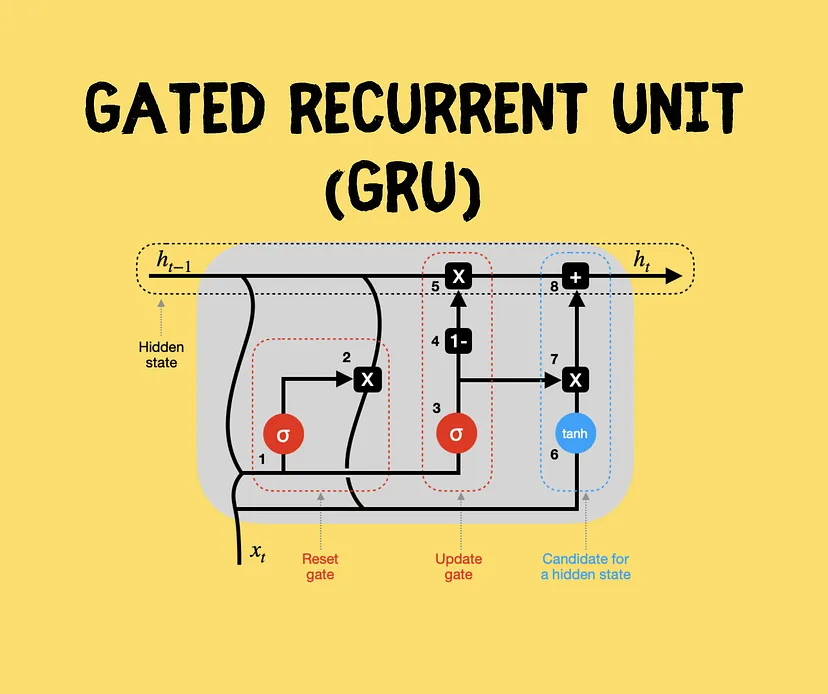

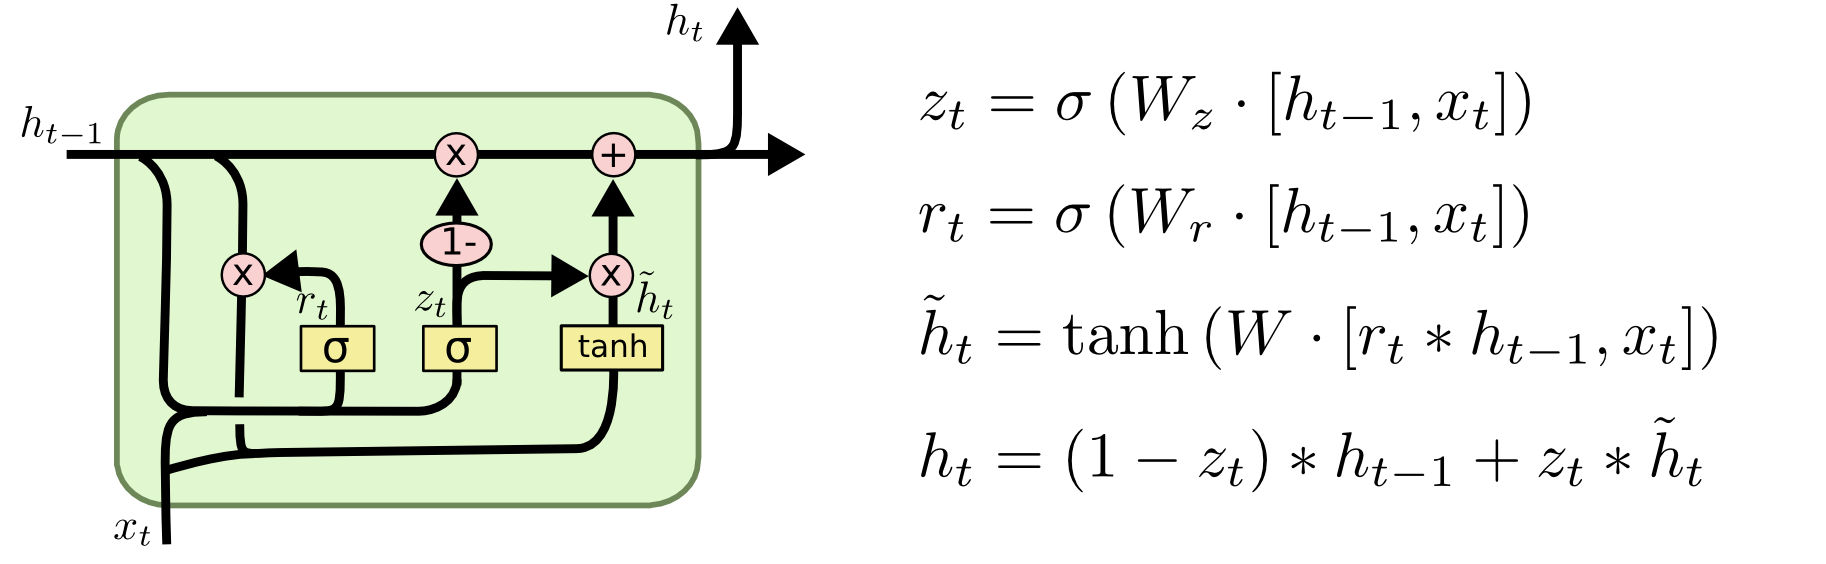

### Training and Backpropagation:

GRUs are trained using gradient-based optimization algorithms like stochastic gradient descent (SGD). Backpropagation through time (BPTT) is used to compute gradients and update the model's parameters during training.


### Vanishing Gradient Problem:

Similar to LSTMs, GRUs are designed to mitigate the vanishing gradient problem in traditional RNNs. The gating mechanisms allow them to preserve gradient flow over long sequences and capture dependencies effectively.

In [9]:
# Define the GRU model
model_1 = Sequential([
    Embedding(10000, 32, input_length=100),
    GRU(5, return_sequences=False),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 32)           320000    
                                                                 
 lstm_1 (LSTM)               (None, 5)                 760       
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 320766 (1.22 MB)
Trainable params: 320766 (1.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Compile the model
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# Train the model
history_1 = model_1.fit(train_input, train_target, epochs=5, batch_size=32, validation_data=(test_input,test_target))

Epoch 1/5
782/782 [==============================] - 30s 36ms/step - loss: 0.5047 - accuracy: 0.7524 - val_loss: 0.4034 - val_accuracy: 0.8291
Epoch 2/5
782/782 [==============================] - 27s 35ms/step - loss: 0.3204 - accuracy: 0.8708 - val_loss: 0.3662 - val_accuracy: 0.8441
Epoch 3/5
782/782 [==============================] - 27s 35ms/step - loss: 0.2477 - accuracy: 0.9056 - val_loss: 0.3657 - val_accuracy: 0.8452
Epoch 4/5
782/782 [==============================] - 26s 33ms/step - loss: 0.1947 - accuracy: 0.9305 - val_loss: 0.4209 - val_accuracy: 0.8321
Epoch 5/5
782/782 [==============================] - 26s 33ms/step - loss: 0.1530 - accuracy: 0.9467 - val_loss: 0.4318 - val_accuracy: 0.8372


Slightly better result on Test Dataset of GRU but mostly comparable.

### **Hyperparameters**:

Tuning hyperparameters such as the number of hidden units, learning rate, and batch size can significantly impact the performance of GRU models.

Cross-validation and hyperparameter search techniques are commonly used to find optimal settings.


1. **Regularization**: Techniques like dropout and weight regularization can be applied to prevent overfitting in GRU models and improve generalization performance.

2. **Optimization Techniques**: Advanced optimization techniques like adaptive learning rate methods (e.g., Adam, RMSProp) and second-order optimization methods can be used to accelerate training and improve convergence in GRU models.



3. **Attention Mechanisms**: Attention mechanisms can be incorporated into GRU models to selectively focus on different parts of the input sequence, improving their ability to capture relevant information and ignore irrelevant noise.


### Advanced Architectures:

 Variants of GRUs, such as stacked GRUs, bidirectional GRUs, hierarchical GRUs, and convolutional GRUs, have been developed to address specific challenges and improve performance on various tasks.


### Let's compare Recurrent Neural Networks (RNNs), Long Short-Term Memory (LSTM) networks, and Gated Recurrent Units (GRUs) across various aspects:

1. **Architecture**:
 - ****RNN****: Basic RNNs have a simple architecture where each neuron's output is fed back into the network at the next time step. They suffer from the vanishing gradient problem and struggle to capture long-range dependencies.
 - ****LSTM****: LSTMs have a more complex architecture with memory cells and gating mechanisms (forget gate, input gate, output gate). These gates control the flow of information, allowing LSTMs to selectively remember or forget information over time and capture long-term dependencies effectively.
 - ****GRU****: GRUs also have memory cells and gating mechanisms, but they are simpler compared to LSTMs. GRUs have two gates (update gate and reset gate) instead of three in LSTMs, making them computationally more efficient.
2. **Gating Mechanisms**:
 - **RNN: Basic RNNs do not have gating mechanisms to control the flow of information. They suffer from the vanishing gradient problem, which limits their ability to capture long-range dependencies.
 - **LSTM**: LSTMs have three gating mechanisms (forget gate, input gate, output gate) that regulate the flow of information through the network. This allows LSTMs to preserve gradient flow over long sequences and capture dependencies effectively.
 - **GRU**: GRUs have two gating mechanisms (update gate and reset gate) that control the flow of information. They are simpler compared to LSTMs but still capable of capturing long-term dependencies.

3. **Memory Cells**:
 - **RNN**: Basic RNNs do not have specialized memory cells to store information over time.
 - **LSTM**: LSTMs have memory cells called Cell and Hidden State that store information over time and are regulated by the gating mechanisms.
 - **GRU**: GRUs also have memory cell, but they are simpler compared to LSTMs.




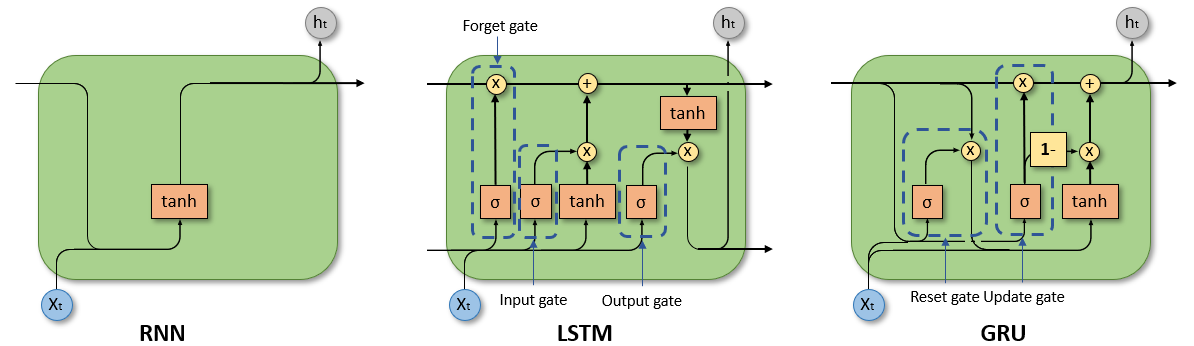

4. **Training and Performance**:
 - **RNN**: Basic RNNs suffer from the vanishing gradient problem, which makes training difficult, especially on long sequences. They are less effective at capturing long-term dependencies.
 - **LSTM**: LSTMs are effective at capturing long-term dependencies and mitigating the vanishing gradient problem. They are widely used in various applications, including natural language processing and time series analysis.
 - **GRU**: GRUs are simpler and computationally more efficient compared to LSTMs. They are also effective at capturing long-term dependencies but have fewer parameters, making them faster to train and potentially more suitable for applications with limited computational resources.

5. **Complexity and Efficiency**:
 - **RNN**: Basic RNNs have a simple architecture but struggle with capturing long-term dependencies.
 - **LSTM**: LSTMs have a more complex architecture with additional gating mechanisms and memory cells, making them more powerful but also more computationally expensive.
 - **GRU**: GRUs have a simpler architecture compared to LSTMs, with fewer parameters and computations. They offer a good balance between complexity and efficiency.

In summary, while all three types of recurrent architectures have their strengths and weaknesses, LSTMs and GRUs are more advanced and effective at capturing long-term dependencies compared to basic RNNs.

 LSTMs are more powerful and versatile but come with higher computational costs, while GRUs offer a simpler and more efficient alternative with comparable performance in many cases.